In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import talib as ta

In [2]:

# Configuración del activo y descarga de datos
activo = 'ETH-USD'
df = yf.Ticker(activo)
df = df.history(start='2022-01-01', end='2024-11-20')

In [3]:
# Cálculo del MACD
df['MACD'], df['Signal_line'], df['Histogram'] = ta.MACD(df['Close'], fastperiod=12,
                                                         slowperiod=26, signalperiod=9)

In [4]:
# Crear columna para señales de compra/venta
df['Signal'] = 0
df.loc[df['MACD'] > df['Signal_line'], 'Signal'] = 1  # Compra
df.loc[df['MACD'] < df['Signal_line'], 'Signal'] = -1  # Venta
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD,Signal_line,Histogram,Signal
Date,,,,,,,,,,,
2024-11-15 00:00:00+00:00,3059.526123,3130.703857,3016.144043,3103.040527,32701369872,0.0,0.0,171.527794,132.273909,39.253885,1
2024-11-16 00:00:00+00:00,3089.739990,3218.089600,3073.286377,3133.273926,26650658846,0.0,0.0,168.851609,139.589449,29.262160,1
2024-11-17 00:00:00+00:00,3133.306641,3160.152588,3039.246826,3075.661621,28348163224,0.0,0.0,160.234794,143.718518,16.516276,1
2024-11-18 00:00:00+00:00,3075.722900,3225.130615,3052.491211,3207.856445,35445557613,0.0,0.0,162.203147,147.415444,14.787703,1
2024-11-19 00:00:00+00:00,3208.250488,3222.004395,3070.362793,3111.384033,29823634432,0.0,0.0,154.201031,148.772561,5.428469,1


In [5]:

# Crear columna "Advice" basada en cambios de Signal
df['Advice'] = 'HOLD'
df.loc[(df['Signal'] == 1) & (df['Signal'].shift(1) <= 0), 'Advice'] = 'BUY'  # Cruce alcista
df.loc[(df['Signal'] == -1) & (df['Signal'].shift(1) >= 0), 'Advice'] = 'SELL'  # Cruce bajista

df['Advice'].value_counts()

Advice
HOLD    981
BUY      37
SELL     36
Name: count, dtype: int64

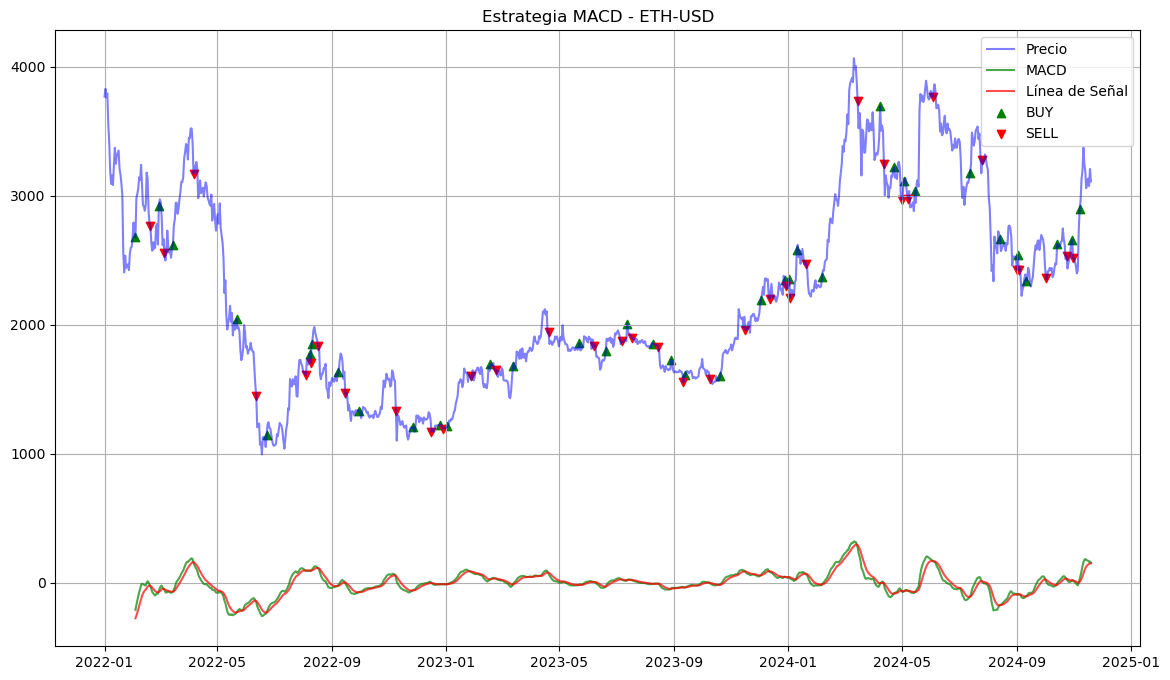

In [6]:

# Gráfico para visualizar las señales
plt.figure(figsize=(14, 8))
plt.plot(df['Close'], label='Precio', color='blue', alpha=0.5)
plt.plot(df['MACD'], label='MACD', color='green', alpha=0.7)
plt.plot(df['Signal_line'], label='Línea de Señal', color='red', alpha=0.7)

# Agregar marcadores para señales BUY y SELL
buy_signals = df[df['Advice'] == "BUY"]
sell_signals = df[df['Advice'] == "SELL"]
plt.scatter(buy_signals.index, buy_signals['Close'], label='BUY', marker='^', color='green', alpha=1)
plt.scatter(sell_signals.index, sell_signals['Close'], label='SELL', marker='v', color='red', alpha=1)

plt.title(f"Estrategia MACD - {activo}")
plt.legend()
plt.grid()
plt.show()



In [7]:
# Mostrar DataFrame con columnas relevantes
print(df[['Close', 'MACD', 'Signal_line', 'Advice']].tail(10))

                                 Close        MACD  Signal_line Advice
Date                                                                  
2024-11-10 00:00:00+00:00  3191.331299  120.519160    47.678075   HOLD
2024-11-11 00:00:00+00:00  3374.812988  157.989296    69.740319   HOLD
2024-11-12 00:00:00+00:00  3246.257324  175.290640    90.850384   HOLD
2024-11-13 00:00:00+00:00  3192.595947  182.567530   109.193813   HOLD
2024-11-14 00:00:00+00:00  3058.948730  175.526939   122.460438   HOLD
2024-11-15 00:00:00+00:00  3103.040527  171.527794   132.273909   HOLD
2024-11-16 00:00:00+00:00  3133.273926  168.851609   139.589449   HOLD
2024-11-17 00:00:00+00:00  3075.661621  160.234794   143.718518   HOLD
2024-11-18 00:00:00+00:00  3207.856445  162.203147   147.415444   HOLD
2024-11-19 00:00:00+00:00  3111.384033  154.201031   148.772561   HOLD
